In [1]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, GRU, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('/content/drive/MyDrive/산업정보공학특론/중간이후_sincos최종.csv')
df.dropna(subset = ['datetime'], inplace = True)
df

,datetime,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
0,2024-03-01 15:00,1.1,-5.7,-5.7,69.0,-3.9,338.0,18.5,18.5,0.0,...,112.19,1343583.333,869166.6667,0.000000,186993.5833,202769.0000,474583.3333,373750.0000,-0.707107,-7.071068e-01
1,2024-03-01 16:00,2.2,-4.3,-4.3,55.0,-6.1,315.0,22.2,22.2,0.0,...,138.50,1337416.667,831166.6667,0.000000,181352.4167,197162.6667,506250.0000,395166.6667,-0.866025,-5.000000e-01
2,2024-03-01 17:00,2.2,-5.4,-5.4,64.0,-3.9,315.0,22.2,22.2,0.0,...,99.48,1318833.333,807500.0000,0.000000,161981.6667,177954.0833,511250.0000,285833.3333,-0.965926,-2.588190e-01
3,2024-03-01 18:00,2.2,-2.6,-2.6,64.0,-3.9,338.0,16.7,16.7,0.0,...,95.38,1298750.000,789833.3333,0.000000,140727.0833,156318.1667,508666.6667,283166.6667,-1.000000,-1.110000e-11
4,2024-03-01 19:00,1.1,-5.1,-5.1,69.0,-3.9,338.0,16.7,16.7,0.0,...,91.24,1285500.000,785083.3333,0.000000,128531.5000,143984.9167,500416.6667,275833.3333,-0.965926,2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,...,87.49,1131833.333,489916.6667,0.000000,197024.2500,197313.7500,644500.0000,360250.0000,-0.965926,2.588190e-01
5890,2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,...,0.00,1146166.667,507500.0000,0.000000,211879.5833,212125.0000,639500.0000,356250.0000,-0.866025,5.000000e-01
5891,2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,...,0.00,1123166.667,529333.3333,0.000000,189122.5833,189367.9167,589000.0000,380916.6667,-0.707107,7.071068e-01
5892,2024-11-04 22:00,15.0,14.3,14.3,58.0,7.2,338.0,9.3,9.3,0.0,...,104.21,1142750.000,577083.3333,3939.449167,191854.0000,196087.6667,572000.0000,391750.0000,-0.500000,8.660254e-01


In [4]:
df = df[9:]

df

,datetime,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
9,2024-03-02 0:00,2.2,4.1,2.1,74.0,-2.2,68.0,3.7,3.7,1.0,...,135.71,1299916.667,678666.6667,107106.575000,34586.68333,157807.3333,621250.0000,519916.6667,-1.370000e-11,1.000000
10,2024-03-02 1:00,2.8,5.6,2.2,64.0,-2.8,23.0,7.4,7.4,2.0,...,104.14,1381166.667,668750.0000,194776.083300,28927.51667,239180.5000,712166.6667,498416.6667,2.588190e-01,0.965926
11,2024-03-02 2:00,3.9,8.8,4.2,60.0,-2.8,315.0,5.6,5.6,4.0,...,138.50,1402333.333,660250.0000,219012.166700,26907.55833,260131.0833,742166.6667,390750.0000,5.000000e-01,0.866025
12,2024-03-02 3:00,5.0,6.8,2.7,48.0,-5.0,270.0,11.1,11.1,4.0,...,95.88,1444416.667,607916.6667,267989.333300,21086.03333,303111.4167,836333.3333,466833.3333,7.071068e-01,0.707107
13,2024-03-02 4:00,6.1,8.6,3.9,48.0,-3.9,315.0,11.1,11.1,5.0,...,95.22,1456250.000,614500.0000,281640.083300,20216.61667,315084.5000,841833.3333,460916.6667,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,...,87.49,1131833.333,489916.6667,0.000000,197024.25000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
5890,2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,...,0.00,1146166.667,507500.0000,0.000000,211879.58330,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
5891,2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,...,0.00,1123166.667,529333.3333,0.000000,189122.58330,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107
5892,2024-11-04 22:00,15.0,14.3,14.3,58.0,7.2,338.0,9.3,9.3,0.0,...,104.21,1142750.000,577083.3333,3939.449167,191854.00000,196087.6667,572000.0000,391750.0000,-5.000000e-01,0.866025


In [5]:
df.set_index('datetime', inplace = True)


In [6]:
df

,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,Bonggae-dong_vis_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-02 0:00,2.2,4.1,2.1,74.0,-2.2,68.0,3.7,3.7,1.0,16.1,...,135.71,1299916.667,678666.6667,107106.575000,34586.68333,157807.3333,621250.0000,519916.6667,-1.370000e-11,1.000000
2024-03-02 1:00,2.8,5.6,2.2,64.0,-2.8,23.0,7.4,7.4,2.0,16.1,...,104.14,1381166.667,668750.0000,194776.083300,28927.51667,239180.5000,712166.6667,498416.6667,2.588190e-01,0.965926
2024-03-02 2:00,3.9,8.8,4.2,60.0,-2.8,315.0,5.6,5.6,4.0,16.1,...,138.50,1402333.333,660250.0000,219012.166700,26907.55833,260131.0833,742166.6667,390750.0000,5.000000e-01,0.866025
2024-03-02 3:00,5.0,6.8,2.7,48.0,-5.0,270.0,11.1,11.1,4.0,16.1,...,95.88,1444416.667,607916.6667,267989.333300,21086.03333,303111.4167,836333.3333,466833.3333,7.071068e-01,0.707107
2024-03-02 4:00,6.1,8.6,3.9,48.0,-3.9,315.0,11.1,11.1,5.0,16.1,...,95.22,1456250.000,614500.0000,281640.083300,20216.61667,315084.5000,841833.3333,460916.6667,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,16.1,...,87.49,1131833.333,489916.6667,0.000000,197024.25000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,16.1,...,0.00,1146166.667,507500.0000,0.000000,211879.58330,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,16.1,...,0.00,1123166.667,529333.3333,0.000000,189122.58330,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107


In [7]:
# Label
y = df.pop('smp_rc')
y

,smp_rc
datetime,
2024-03-02 0:00,103.5675
2024-03-02 1:00,101.6050
2024-03-02 2:00,49.1600
2024-03-02 3:00,-61.8725
2024-03-02 4:00,-18.4125
...,...
2024-11-04 19:00,87.5125
2024-11-04 20:00,98.8600
2024-11-04 21:00,103.8175


In [8]:
Test_y = y[-144:]
Test_X = df[-144:]

Train_X = df[:-144]
Train_y = y[:-144]

In [9]:
Test_X.shape, Train_X.shape, Test_y.shape, Train_y.shape

((144, 404), (5741, 404), (144,), (5741,))

In [10]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
X_scaler.fit(Train_X)

y_scaler = RobustScaler()
y_scaler.fit(Train_y.values.reshape(-1, 1))

RobustScaler()

In [11]:
Train_X[Train_X.columns] = X_scaler.transform(Train_X[Train_X.columns])
Test_X[Test_X.columns] = X_scaler.transform(Test_X[Test_X.columns])

Train_y = y_scaler.transform(Train_y.values.reshape(-1, 1))
Test_y = y_scaler.transform(Test_y.values.reshape(-1, 1))

In [12]:
train_df = Train_X
train_df['smp_rc'] = Train_y

test_df = Test_X
test_df['smp_rc'] = Test_y

In [13]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='smp_rc', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)


    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

In [14]:
# 손실 함수 정의
import tensorflow as tf

# 손실 함수 정의
def calculate_measure(y_true, y_pred):
    # 텐서로 변환
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)

    # 양수/음수 구분
    positive_index = y_true > 0
    negative_index = y_true <= 0

    # 작은 음수 값 처리
    y_true = tf.where((y_true <= 0) & (y_true > -1), -1.0, y_true)

    # e1과 e2 계산
    n1 = tf.reduce_sum(tf.cast(positive_index, tf.float32)) + 1e-7
    n2 = tf.reduce_sum(tf.cast(negative_index, tf.float32)) + 1e-7
    e1 = tf.reduce_sum(tf.abs(y_true[positive_index] - y_pred[positive_index]) / tf.abs(y_true[positive_index])) / n1
    e2 = tf.reduce_sum(tf.abs(y_true[negative_index] - y_pred[negative_index]) / tf.abs(y_true[negative_index])) / n2

    # 정확도 계산
    TP = tf.reduce_sum(tf.cast((y_pred > 0) & (y_true > 0), tf.float32))
    TN = tf.reduce_sum(tf.cast((y_pred <= 0) & (y_true <= 0), tf.float32))
    FP = tf.reduce_sum(tf.cast((y_pred > 0) & (y_true <= 0), tf.float32))
    FN = tf.reduce_sum(tf.cast((y_pred <= 0) & (y_true > 0), tf.float32))
    Accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-7)

    # 최종 손실 값 계산
    e_F = 0.2 * e1 + 0.8 * e2 - (Accuracy - 0.95)
    return e_F


In [15]:
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=calculate_measure,
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       callbacks=[early_stopping])

    return history

In [16]:
multi_window = DataWindow(input_width=48, label_width=24, shift=24, label_columns=['smp_rc'])

In [17]:
ms_gru_model = Sequential([
    GRU(64, return_sequences=True),
    Dense(1, kernel_initializer = tf.initializers.zeros),
    Lambda(lambda x: x[:, -24:, :])  # 마지막 24시간만 출력
])

history = compile_and_fit(ms_gru_model, multi_window)

performance = {}

performance['GRU'] = ms_gru_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - loss: 1.3580 - mean_absolute_error: 0.6043
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 1.2230 - mean_absolute_error: 0.5863
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 1.1377 - mean_absolute_error: 0.5326
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - loss: 0.9594 - mean_absolute_error: 0.4642
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - loss: 0.8119 - mean_absolute_error: 0.4598
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.6844 - mean_absolute_error: 0.4532
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.6205 - mean_absolute_error: 0.4471
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.5827 - mean_absolute_error: 0.4433
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 0.5907 - mean_absolute_error: 0.4437
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.5378 - mean_absolute_error: 0.4343
Epoch 11/5

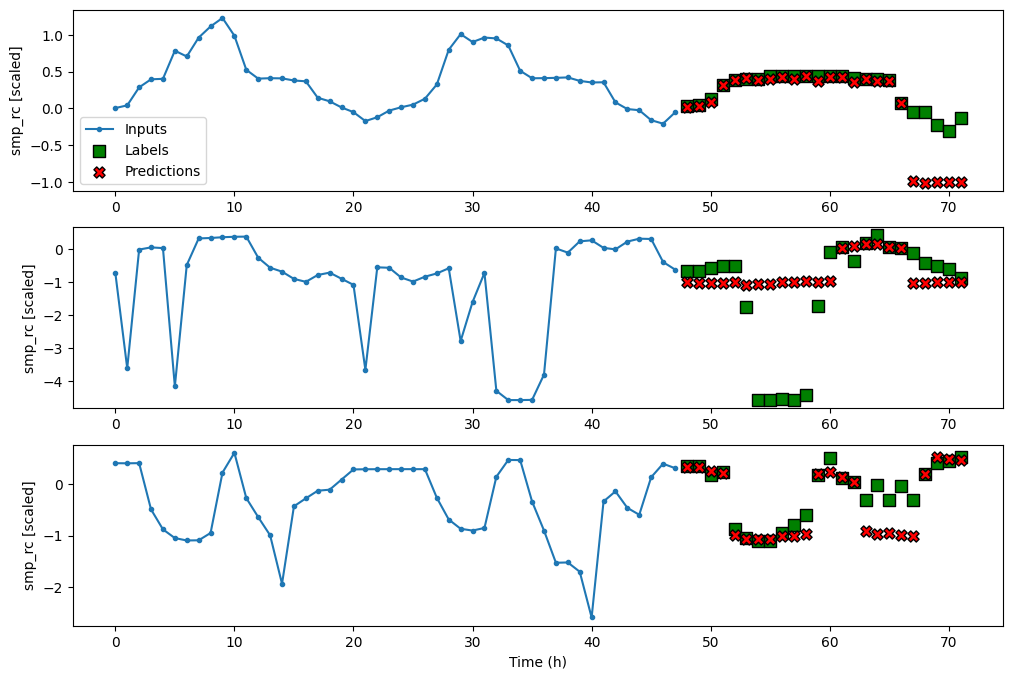

In [18]:
multi_window.plot(ms_gru_model)


In [32]:
rolling_input  = Test_X[:24].values
rolling_input

array([[-2.20000000e-01, -2.06666667e-01, -1.97368421e-01, ...,
        -4.53467579e-12,  7.07106781e-01, -3.44025157e-01],
       [-1.10000000e-01, -1.20000000e-01, -1.51315789e-01, ...,
         1.83012702e-01,  6.83012702e-01, -4.61635220e-01],
       [-1.10000000e-01, -9.33333333e-02, -1.38157895e-01, ...,
         3.53553391e-01,  6.12372436e-01, -5.72589099e-01],
       ...,
       [-3.30000000e-01, -3.86666667e-01, -2.89473684e-01, ...,
        -5.00000000e-01,  5.00000000e-01, -8.08228512e-01],
       [-3.30000000e-01, -3.93333333e-01, -2.96052632e-01, ...,
        -3.53553391e-01,  6.12372436e-01, -7.33123690e-01],
       [-2.20000000e-01, -2.86666667e-01, -1.90789474e-01, ...,
        -1.83012702e-01,  6.83012702e-01, -1.73008386e-01]])

In [33]:
# 롤링 예측 설정
rolling_predictions = []  # 예측값 저장
rolling_steps = 24 * 5    # 예측 기간: 5일 (120시간)

for step in range(rolling_steps):
    # 모델 입력 형태로 변환 (배치 차원 추가)
    rolling_input_reshaped = np.expand_dims(rolling_input, axis=0)  # (1, 24, feature_dim)

    # 예측
    predicted_value = ms_gru_model.predict(rolling_input_reshaped, verbose=0)

    # 예측값 저장
    rolling_predictions.append(predicted_value[0, -1, 0])  # 마지막 1시간의 예측값

    # 실제값으로 다음 입력 데이터 업데이트
    if step + 24 < len(Test_X):  # Test_X에 실제 값이 존재하는 경우
        rolling_input = Test_X[step + 1:step + 25].values  # 1시간씩 앞으로 이동
    else:
        break  # 실제 데이터가 없으면 중단


In [34]:
# 결과를 NumPy 배열로 변환
rolling_predictions = np.array(rolling_predictions)

# 역정규화 (y_scaler 사용)
rolling_predictions_original = y_scaler.inverse_transform(rolling_predictions.reshape(-1, 1))


In [35]:
import pandas as pd

# 시간 축 생성: 10월 31일 00:00부터 5일간
start_time = pd.Timestamp("2023-10-31 00:00:00")
time_index = pd.date_range(start=start_time, periods=len(rolling_predictions_original), freq="H")


In [40]:
# 실제값 (역정규화된 Test_y에서 10월 31일부터 11월 4일까지)
actual_values = y_scaler.inverse_transform(Test_y[24:144].reshape(-1, 1))  # 120시간 데이터


In [41]:
import pandas as pd

# 시간 축 생성: 10월 31일부터 11월 4일까지 (120시간)
start_time = pd.Timestamp("2023-10-31 00:00:00")
time_index = pd.date_range(start=start_time, periods=120, freq="H")


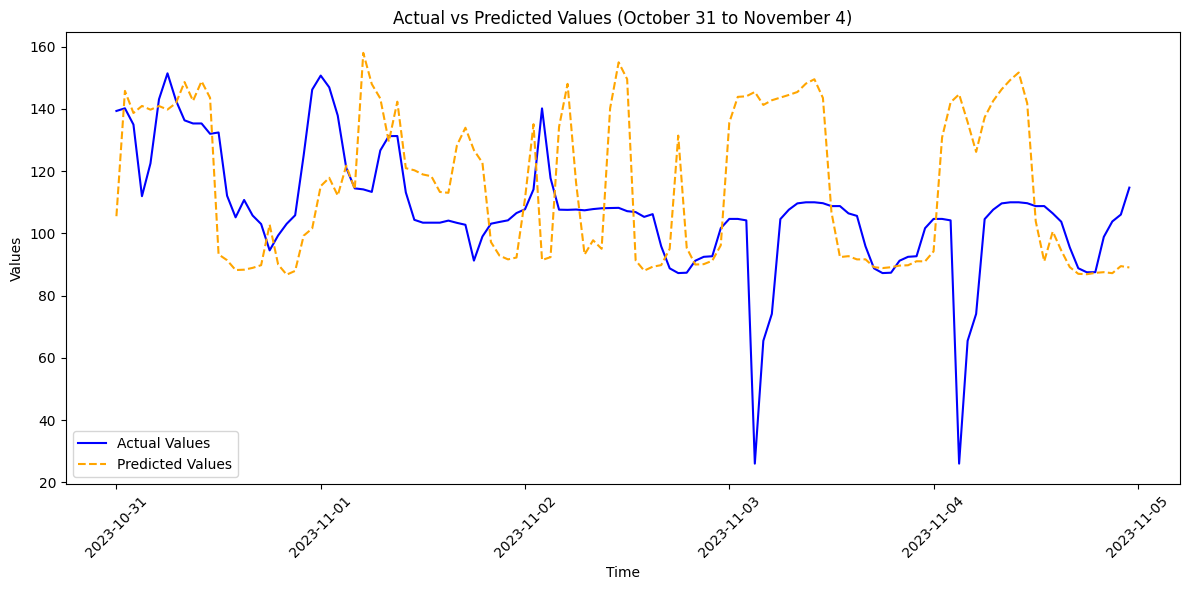

In [42]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 6))

# 실제값 플롯
plt.plot(time_index, actual_values, label="Actual Values", color="blue")

# 예측값 플롯
plt.plot(time_index, rolling_predictions_original, label="Predicted Values", color="orange", linestyle="--")

# 그래프 꾸미기
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values (October 31 to November 4)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# 시각화 출력
plt.show()


In [49]:
actual_prediction = pd.concat([pd.DataFrame(actual_values, columns=['actual']), pd.DataFrame(rolling_predictions_original, columns=['prediction'])], axis=1)
actual_prediction.set_index(time_index, inplace=True)
actual_prediction



,actual,prediction
2023-10-31 00:00:00,139.3175,105.497147
2023-10-31 01:00:00,140.1700,145.764526
2023-10-31 02:00:00,134.9450,138.660370
2023-10-31 03:00:00,111.9300,140.924988
2023-10-31 04:00:00,122.4725,139.728912
...,...,...
2023-11-04 19:00:00,87.5125,87.289246
2023-11-04 20:00:00,98.8600,87.515396
2023-11-04 21:00:00,103.8175,87.191475
2023-11-04 22:00:00,106.0175,89.459061


In [44]:
rolling_predictions_original

array([[105.49715 ],
       [145.76453 ],
       [138.66037 ],
       [140.92499 ],
       [139.72891 ],
       [140.89893 ],
       [139.77223 ],
       [141.85551 ],
       [148.60118 ],
       [142.55501 ],
       [148.86682 ],
       [143.5463  ],
       [ 93.22449 ],
       [ 91.35838 ],
       [ 88.20085 ],
       [ 88.31317 ],
       [ 88.89449 ],
       [ 89.763336],
       [102.79972 ],
       [ 89.96056 ],
       [ 86.71665 ],
       [ 87.93714 ],
       [ 99.248505],
       [101.55372 ],
       [115.1645  ],
       [117.83561 ],
       [112.127365],
       [121.74622 ],
       [114.136024],
       [157.98056 ],
       [147.951   ],
       [143.32835 ],
       [129.45857 ],
       [142.29147 ],
       [120.93019 ],
       [120.26252 ],
       [118.91813 ],
       [118.33564 ],
       [113.294464],
       [113.01997 ],
       [128.24187 ],
       [133.92313 ],
       [126.72734 ],
       [122.66523 ],
       [ 97.18933 ],
       [ 92.838356],
       [ 91.62824 ],
       [ 92.2

In [53]:
def calculate_measure(actual, forecast):
    # 명시적으로 numpy 배열로 변환 후, 데이터 타입 통일
    actual = np.array(actual, dtype=np.float32)
    forecast = np.array(forecast, dtype=np.float32)

    positive_index = actual > 0
    negative_index = actual <= 0
    actual[(actual <= 0) & (actual > -1)] = -1
    n1 = np.sum(positive_index) + 1e-7
    n2 = np.sum(negative_index) + 1e-7
    e1 = np.sum(np.abs(actual[positive_index] - forecast[positive_index]) / np.abs(actual[positive_index])) / n1
    e2 = np.sum(np.abs(actual[negative_index] - forecast[negative_index]) / np.abs(actual[negative_index])) / n2
    TP = np.sum((forecast > 0) & (actual > 0))
    TN = np.sum((forecast <= 0) & (actual <= 0))
    FP = np.sum((forecast > 0) & (actual <= 0))
    FN = np.sum((forecast <= 0) & (actual > 0))
    Accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-7)
    e_F = 0.2 * e1 + 0.8 * e2 - (Accuracy - 0.95)
    return e_F


In [54]:
actual_prediction.index = pd.to_datetime(actual_prediction.index)  # 인덱스를 datetime 형식으로 변환
actual_prediction['date'] = actual_prediction.index.date  # 날짜만 추출

# 날짜별 손실 계산
daily_loss = {}
for date, group in actual_prediction.groupby('date'):  # 날짜별 그룹화
    actual = group['actual'].values  # 실제값 추출
    prediction = group['prediction'].values  # 예측값 추출
    loss = calculate_measure(actual, prediction)  # 손실 함수 계산
    daily_loss[date] = loss  # 손실 저장

# 결과 출력
for date, loss in daily_loss.items():
    print(f"Date: {date}, Total Loss: {loss:.4f}")

Date: 2023-10-31, Total Loss: -0.0226
Date: 2023-11-01, Total Loss: -0.0180
Date: 2023-11-02, Total Loss: -0.0145
Date: 2023-11-03, Total Loss: 0.0373
Date: 2023-11-04, Total Loss: 0.0346
